### Week 21 Group In Class

1. Make sure you can get the API from class to work in Azure. Take a screenshot of it working and add the image to a jupyter notebook.

Screen Shot 2021-07-22 at 4.18.09 PM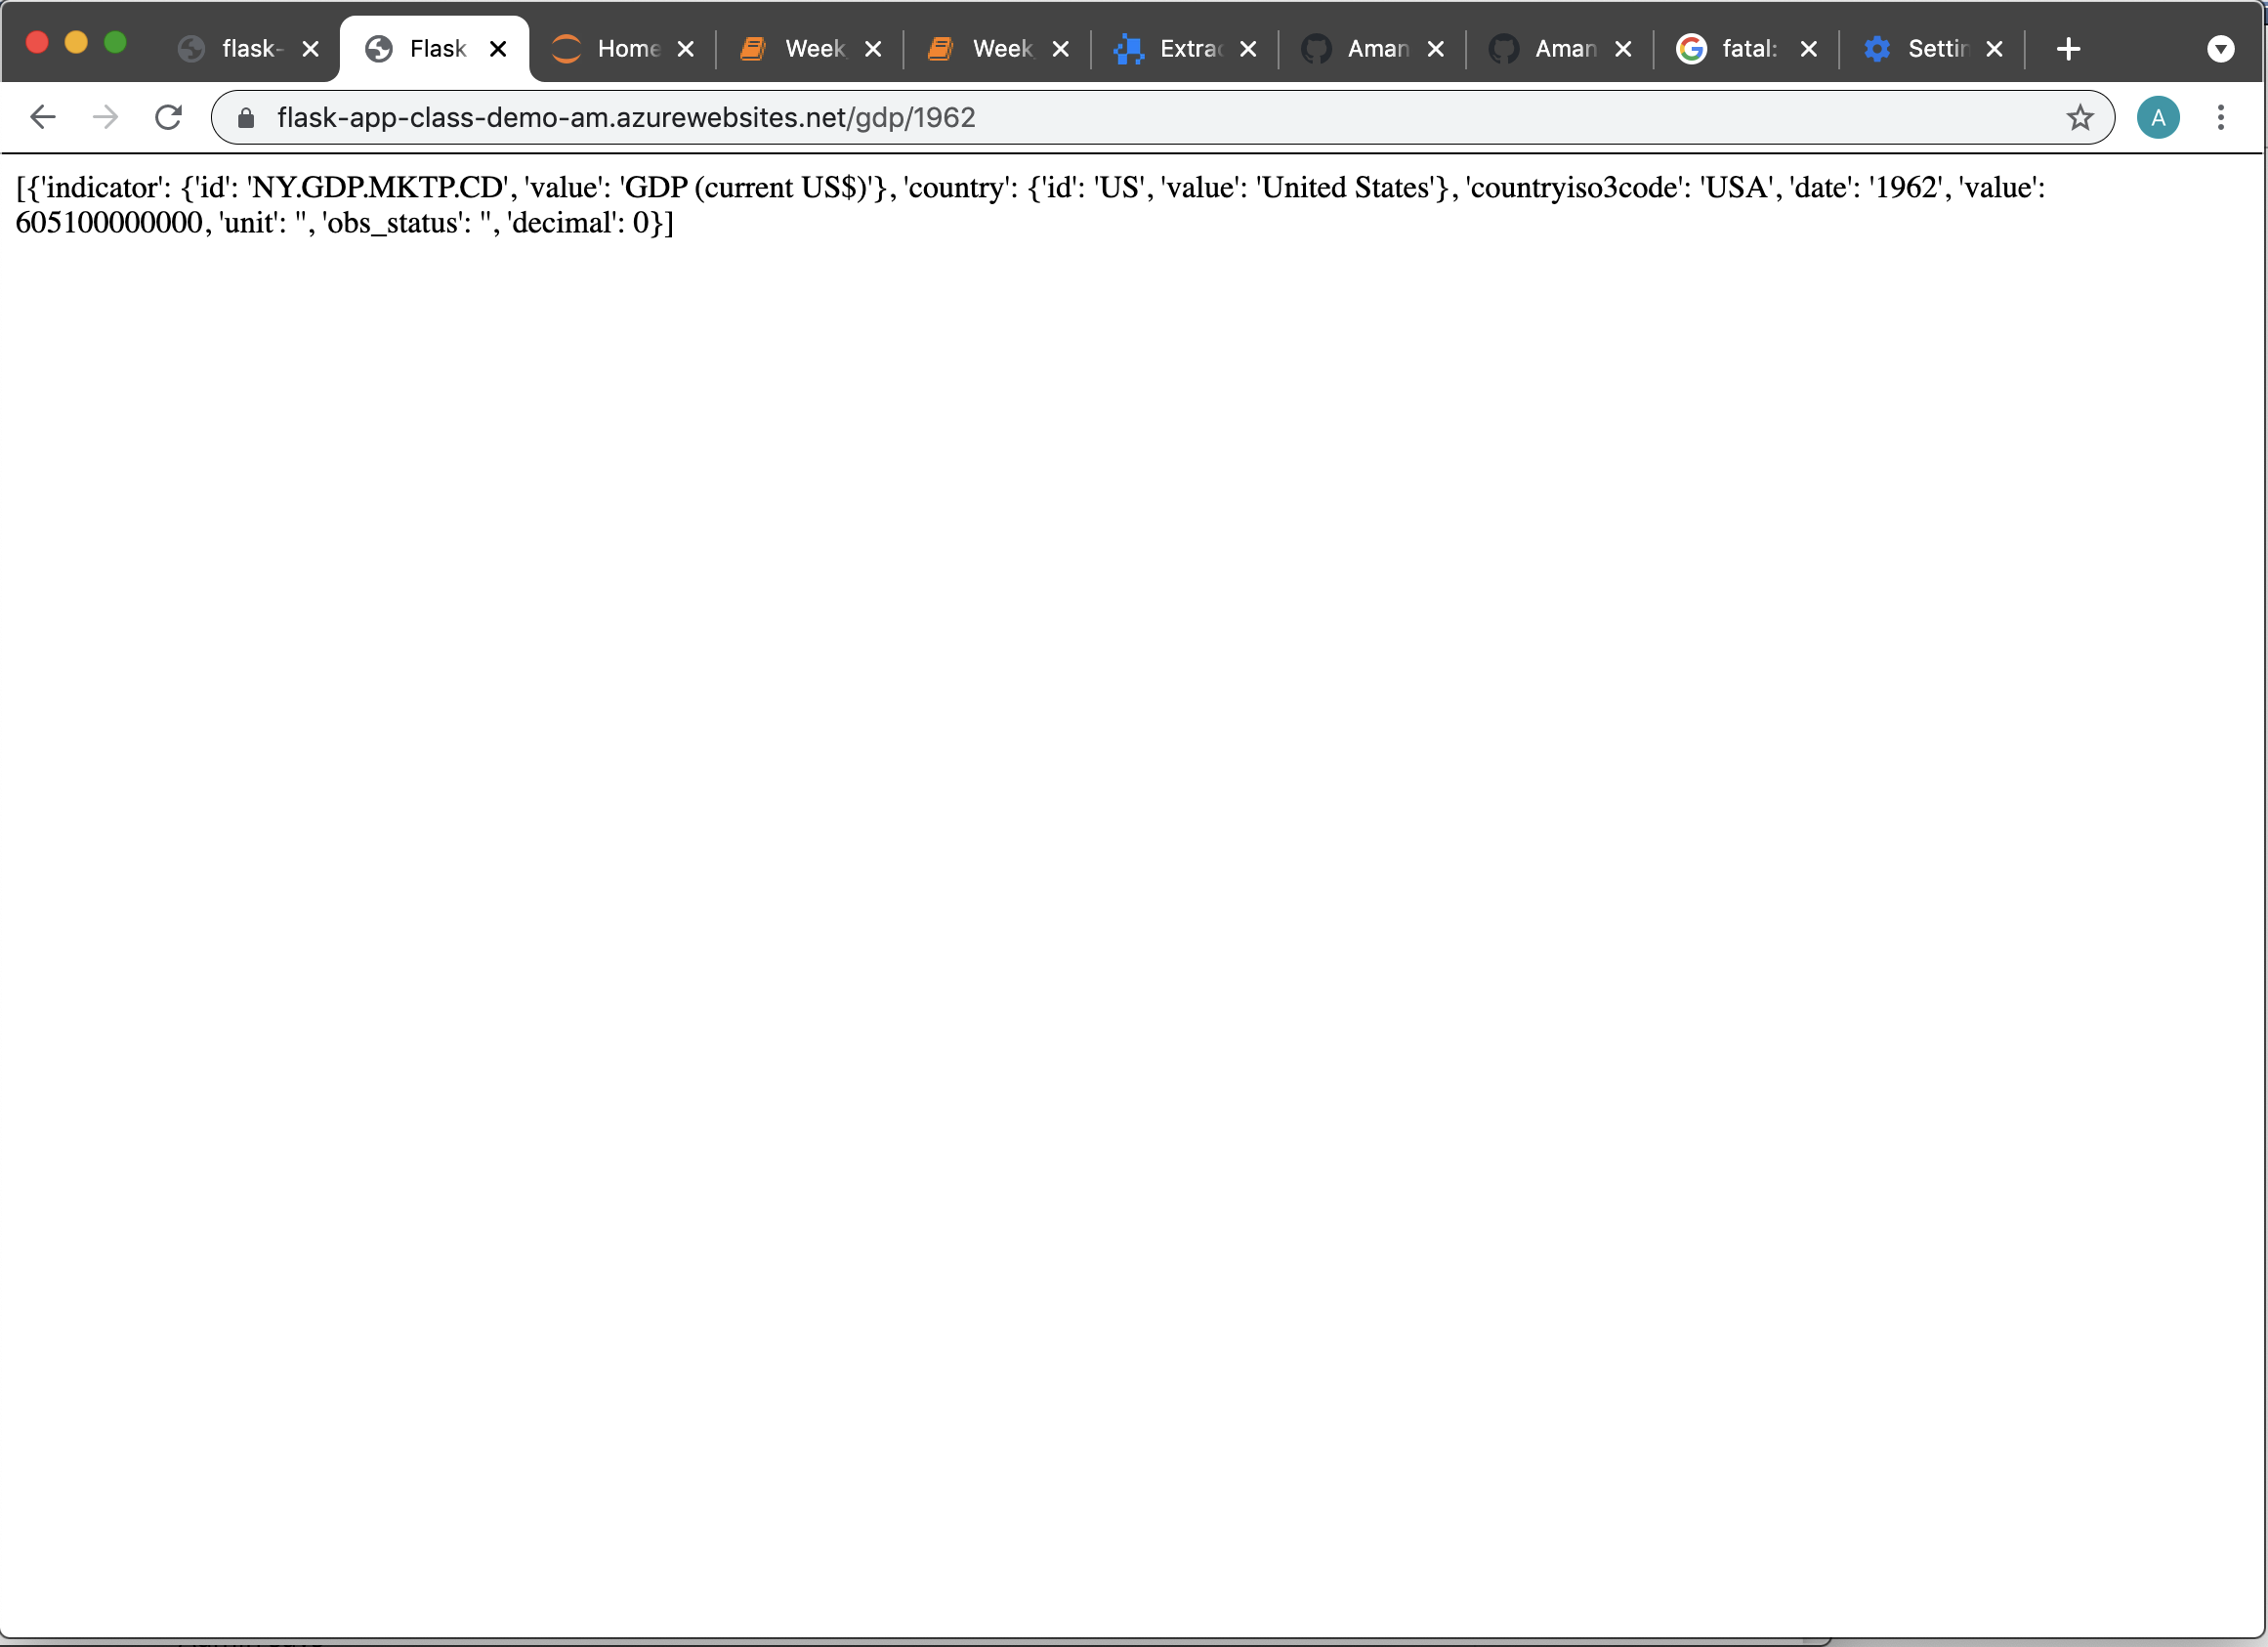

2. Loop through the API data in python using the /gdp/<year> endpoint for your API. Add the data to a dataframe.

In [183]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import json

In [184]:
base_url = "https://flask-app-class-demo-am.azurewebsites.net/gdp/"


GDP_dict = {"Country":[],
           "Year":[],
            "GDP":[]}

for i in range(1960, 2021):
    
    # send http request
    req = requests.get(base_url + str(i))

    soup = BeautifulSoup(req.text)
    data_str = soup.div.div.contents[2]

    data_str = data_str.replace("'", '"')
    data = json.loads(data_str)

    GDP_dict['Country'].append(data[0]['countryiso3code'])
    GDP_dict['Year'].append(data[0]['date'])
    GDP_dict['GDP'].append(data[0]['value'])


In [185]:
df = pd.DataFrame(GDP_dict)

In [186]:
df

,Country,Year,GDP
0,USA,1960,543300000000
1,USA,1961,563300000000
2,USA,1962,605100000000
3,USA,1963,638600000000
4,USA,1964,685800000000
...,...,...,...
56,USA,2016,18745075687000
57,USA,2017,19542979183000
58,USA,2018,20611860934000
59,USA,2019,21433224697000


#### Leaving my practice code

In [136]:
req.headers['Content-Type']

'text/html; charset=utf-8'

In [137]:
req.encoding

'utf-8'

In [138]:
req.text

'<!DOCTYPE html>\n<html lang="en">\n\n<head>\n  <meta charset="UTF-8">\n  <title>Flask Templates</title>\n</head>\n\n<body>\n  <div class="container">\n\n    <div class="jumbotron text-center">\n      <!-- Render our data -->\n      [{&#39;indicator&#39;: {&#39;id&#39;: &#39;NY.GDP.MKTP.CD&#39;, &#39;value&#39;: &#39;GDP (current US$)&#39;}, &#39;country&#39;: {&#39;id&#39;: &#39;US&#39;, &#39;value&#39;: &#39;United States&#39;}, &#39;countryiso3code&#39;: &#39;USA&#39;, &#39;date&#39;: &#39;1962&#39;, &#39;value&#39;: 605100000000, &#39;unit&#39;: &#39;&#39;, &#39;obs_status&#39;: &#39;&#39;, &#39;decimal&#39;: 0}]\n    </div>\n\n  </div>\n</body>\n\n</html>'

In [206]:
soup = BeautifulSoup(req.text)

In [207]:
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Flask Templates</title>
</head>
<body>
<div class="container">
<div class="jumbotron text-center">
<!-- Render our data -->
      [{'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'US', 'value': 'United States'}, 'countryiso3code': 'USA', 'date': '2020', 'value': 20936600000000, 'unit': '', 'obs_status': '', 'decimal': 0}]
    </div>
</div>
</body>
</html>

In [208]:
data_str = soup.div.div.contents[2].strip()
print(data_str)
type(data_str)

[{'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'}, 'country': {'id': 'US', 'value': 'United States'}, 'countryiso3code': 'USA', 'date': '2020', 'value': 20936600000000, 'unit': '', 'obs_status': '', 'decimal': 0}]


str

In [213]:
import ast
data = ast.literal_eval(data_str)
data[0]['date']

'2020'

In [ ]:
ty

In [202]:
data_str = data_str.replace("'", '"')

In [200]:
data_str

'\n      [{"indicator": {"id": "NY.GDP.MKTP.CD", "value": "GDP (current US$)"}, "country": {"id": "US", "value": "United States"}, "countryiso3code": "USA", "date": "2020", "value": 20936600000000, "unit": "", "obs_status": "", "decimal": 0}]\n    '

In [106]:
data = json.loads(data_str)

In [111]:
type(data)

list

In [205]:
data

[{'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
  'country': {'id': 'US', 'value': 'United States'},
  'countryiso3code': 'USA',
  'date': '2020',
  'value': 20936600000000,
  'unit': '',
  'obs_status': '',
  'decimal': 0}]